<a href="https://colab.research.google.com/github/vishnupriya721811/Attendance-Management-Systsem/blob/main/Insyde_io_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from flask import Flask, request, jsonify


In [ ]:
# Step 1: Improved dataset generation with spacing constraints
def generate_data(num_samples=2000, board_size=(10, 10), num_components=5):
    X, y = [], []
    for _ in range(num_samples):
        obstacles = np.zeros(board_size)

        # Improved obstacle generation
        num_obstacles = random.randint(3, 7)
        for _ in range(num_obstacles):
            while True:
                ox, oy = random.randint(0, board_size[0]-1), random.randint(0, board_size[1]-1)
                if obstacles[ox, oy] == 0:
                    obstacles[ox, oy] = 1
                    break

        # Component placement with spacing constraints
        components = []
        min_spacing = 2  # Minimum spacing between components
        for _ in range(num_components):
            while True:
                cx, cy = random.uniform(0, board_size[0]), random.uniform(0, board_size[1])
                valid = True
                for comp in components:
                    if np.linalg.norm(np.array([cx, cy]) - np.array(comp)) < min_spacing:
                        valid = False
                        break
                if valid and obstacles[int(cx), int(cy)] == 0:
                    components.append([cx, cy])
                    break

        X.append(obstacles)
        y.append(np.array(components).flatten())
    return np.array(X), np.array(y)


In [3]:
# Step 2: Enhanced model with CNN layers for spatial data
X, y = generate_data()
X = X.reshape(X.shape[0], 10, 10, 1)  # Reshape for CNN

y = y / 10.0  # Normalize positions

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(10, 10, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(y.shape[1])  # Output layer for component positions
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1841 - mae: 0.3510 - val_loss: 0.0895 - val_mae: 0.2583
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0989 - mae: 0.2665 - val_loss: 0.0887 - val_mae: 0.2578
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0948 - mae: 0.2643 - val_loss: 0.0870 - val_mae: 0.2542
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0926 - mae: 0.2610 - val_loss: 0.0863 - val_mae: 0.2541
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0908 - mae: 0.2589 - val_loss: 0.0870 - val_mae: 0.2555
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0905 - mae: 0.2589 - val_loss: 0.0873 - val_mae: 0.2559
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0901 - mae: 0.2585 - val_loss: 0.0861 - val_mae: 0.2535
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0896 - mae: 0.2578 - val_loss: 0.0870 - val_mae: 0.2549
Epoch 9/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.08

In [5]:
# Step 3: Deployment with Flask
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['obstacles']
    data = np.array(data).reshape(1, 10, 10, 1)
    predicted = model.predict(data).reshape(-1, 2) * 10
    return jsonify({"predicted_positions": predicted.tolist()})

In [7]:
# Step 4: Enhanced visualization
def visualize_board(obstacles, predicted):
    plt.figure(figsize=(6, 6))
    sns.heatmap(obstacles, cmap='Greys', cbar=False, linewidths=0.5, linecolor='black', square=True)
    plt.scatter(predicted[:, 0], predicted[:, 1], color='red', marker='o', label='Components', s=100)
    plt.xticks(np.arange(0, 10, 1))
    plt.yticks(np.arange(0, 10, 1))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title("Optimized PCB Component Placement")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


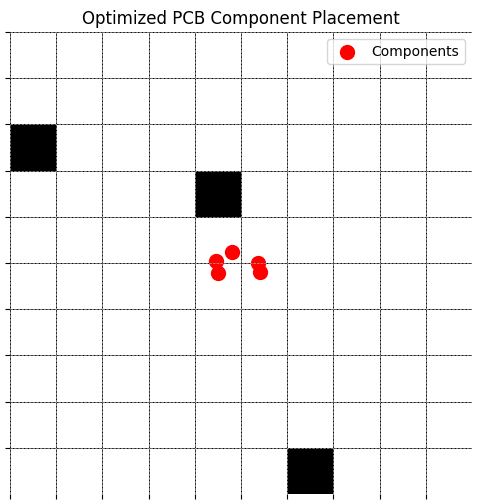

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
# Step 5: Test visualization
X_test, _ = generate_data(1)
predicted = model.predict(X_test.reshape(1, 10, 10, 1)).reshape(-1, 2) * 10
visualize_board(X_test[0], predicted)

if __name__ == '__main__':
    app.run(debug=True)